In [8]:
import networkx as nx
import matplotlib.pyplot as plt
import collections
import numpy as np
from sklearn.datasets import make_blobs
import umap.umap_ as umap
from seirsplus.models import *
from seirsplus.networks import *
import statistics
import seir
from seir_experiments import * 
import statistics

In [2]:
with open('Final Outputs/Loc_BA_Ofir_Graphs.pkl', 'rb') as infile:
    graphs = pickle.load(infile)

In [3]:
graphs

In [4]:
def ipfnB(G1,s=10000,e=1,i=1):
#s = no of points
    SIGMA  = 1/5.2
    GAMMA  = 1/10
    MU_I   = 0.002
    
    R0     = 2.5
    BETA   = 1/(1/GAMMA) * R0
    BETA_Q = 0.5*BETA

    P      = 0.2
    Q      = 0.05
    
    E=s*e/100
    I=s*i/100
    
    model_base = SEIRSNetworkModel(G       = G1, 
                          beta    = BETA, 
                          sigma   = SIGMA, 
                          gamma   = GAMMA, 
                          initE = E, initI = I)
    
    model_base.run(T=300)
    fig,axs = model_base.figure_basic()
    
    line0 = axs.lines[0] 
    line = axs.lines[1]
    line1=axs.lines[2]
    #line2 = axs.lines[3]
    p = line.get_data()
    exp = line0.get_data()
    sus = line1.get_data()
    p0 = p[0].compressed()
    p1 = p[1].compressed()
    #Maximum
    m = max(p[1])
    #Days Max
    ind= numpy.argmax(p[1])
    d = p[0][numpy.argmax(p[1])]
    #Mean and St Deviation
    mean  = statistics.mean(p1)
    stdev =  statistics.stdev(p1)
    line1 = axs.lines[2]
    w = line1.get_data()
    #Total Infections
    tot = 1 -(w[1][w[1].shape[0]-1])
    tp = 0.1*m
    np = 0.9*m
    #Ten Percent
    tpl =[]
    for i in range(len(p1)):
        x = numpy.abs(p1[i]-tp)
        if(x<0.001):
            #print(p1[i],x,p0[i])
            tpl.append(p0[i])
    tplval = statistics.mean(tpl)
    
    #Ninety Percent
    nplfh =[]
    nplsh = []
    for i in range(ind):
        x = numpy.abs(p1[i]-np)
        if(x<0.001):
            #print(p1[i],x,p0[i])
            nplfh.append(p0[i])
    for i in range(ind, len(p1)):
        x = numpy.abs(p1[i]-np)
        if(x<0.001):
            #print(p1[i],x,p0[i])
            nplsh.append(p0[i])
    npl=[(statistics.mean(nplfh)),(statistics.mean(nplsh))]
    
    
    return [m,d,tot,tplval,npl, mean, stdev],p,exp,sus

In [5]:
g1 = graphs[0]

t = 0.00
t = 10.04
t = 20.02
t = 30.00
t = 40.00
t = 50.00
t = 60.00
t = 70.00
t = 80.00
t = 90.01
t = 100.02
t = 110.00
t = 120.01
t = 130.15
t = 140.15
t = 150.52
t = 160.41
t = 170.14
t = 180.69


/home/u72216/.local/lib/python3.7/site-packages/seirsplus/models.py:1562: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:,.0%}'.format(y) for y in ax.get_yticks()])


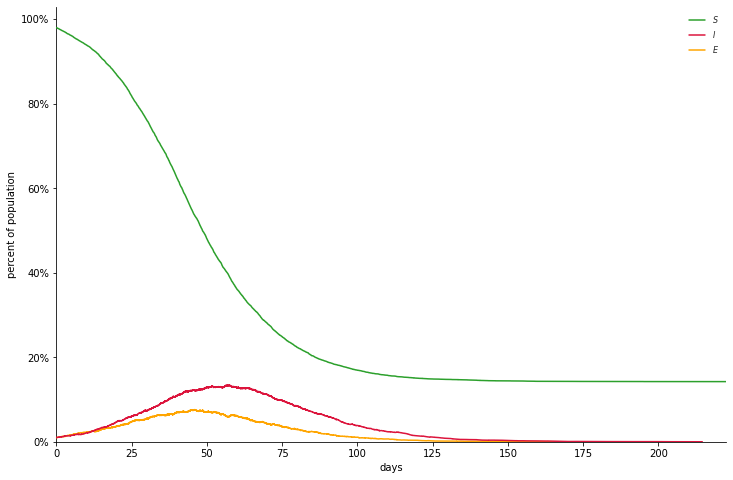

In [7]:
res1,inf,exp,sus = ipfnB(g1,e=1,i=1)

In [9]:
import matplotlib 
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20) 

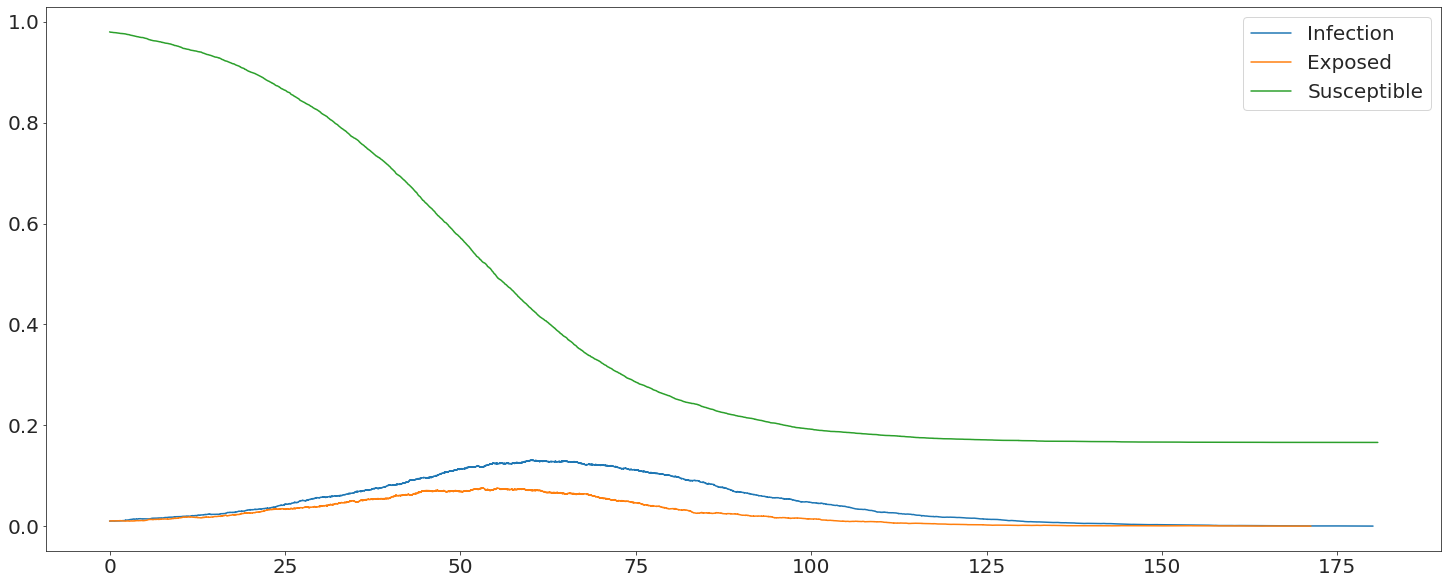

In [10]:
x1 = inf[0].compressed()
y1 = inf[1].compressed()
plt.plot(x1, y1, label = "Infection")

x2 = exp[0].compressed()
y2 = exp[1].compressed()
plt.plot(x2, y2, label = "Exposed")

x3 = sus[0].compressed()
y3 = sus[1].compressed()
plt.plot(x3, y3, label = "Susceptible")

plt.legend(prop={'size': 20})
plt.show()

t = 0.01
t = 10.00
t = 20.00
t = 30.00
t = 40.00
t = 50.00
t = 60.00
t = 70.01
t = 80.01
t = 90.01
t = 100.06
t = 110.02
t = 120.07
t = 130.12
t = 140.13
t = 150.17
t = 160.53
t = 170.58


/home/u72216/.local/lib/python3.7/site-packages/seirsplus/models.py:1562: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:,.0%}'.format(y) for y in ax.get_yticks()])


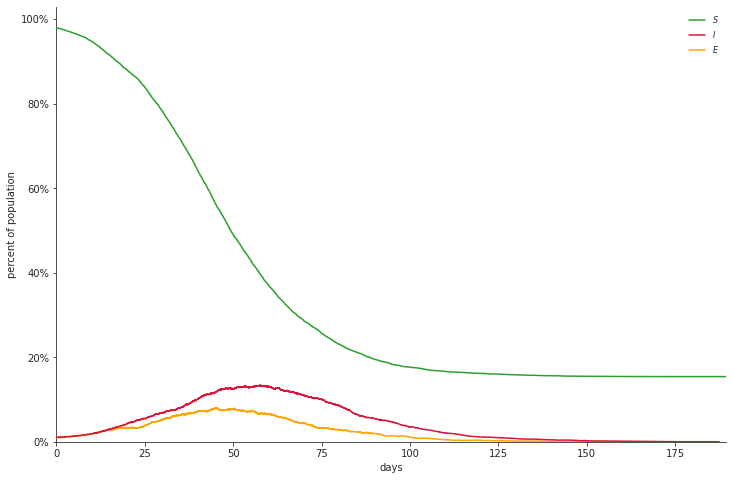

t = 0.03
t = 10.00
t = 20.00
t = 30.00
t = 40.00
t = 50.00
t = 60.00
t = 70.01
t = 80.00
t = 90.00
t = 100.01
t = 110.00
t = 120.02
t = 130.06
t = 140.08
t = 150.01
t = 160.66
t = 170.09
t = 190.48
t = 200.65


/home/u72216/.local/lib/python3.7/site-packages/seirsplus/models.py:1562: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:,.0%}'.format(y) for y in ax.get_yticks()])


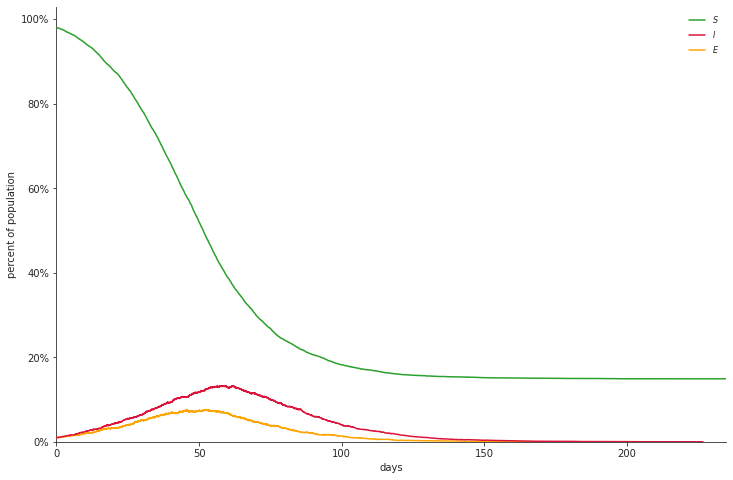

t = 0.00
t = 10.01
t = 20.04
t = 30.01
t = 40.00
t = 50.01
t = 60.01
t = 70.00
t = 80.01
t = 90.00
t = 100.01
t = 110.01
t = 120.00
t = 130.00
t = 140.00
t = 150.08
t = 160.11
t = 170.21
t = 180.10
t = 190.10
t = 200.10
t = 210.18
t = 220.19
t = 230.69
t = 240.28
t = 250.79
t = 260.48
t = 290.74


/home/u72216/.local/lib/python3.7/site-packages/seirsplus/models.py:1562: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:,.0%}'.format(y) for y in ax.get_yticks()])


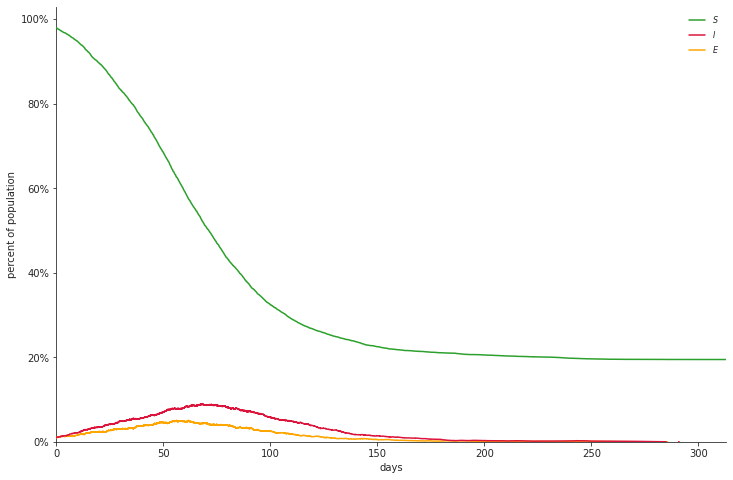

In [64]:
res1,line1,exp,sus = ipfnB(graphs[0],e=1,i=1)
res2,line2,exp,sus = ipfnB(graphs[1],e=1,i=1)
res3,line3,exp,sus = ipfnB(graphs[2],e=1,i=1)


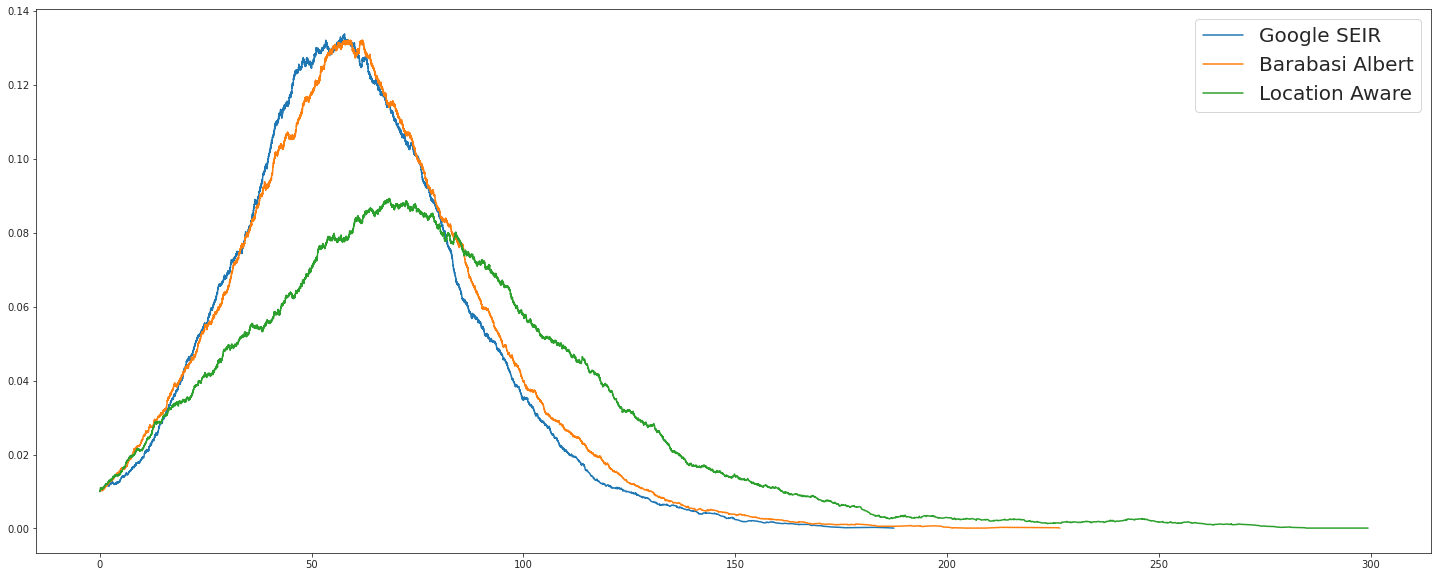

In [65]:
x1 = line1[0].compressed()
y1 = line1[1].compressed()
plt.plot(x1, y1, label = "Google SEIR")

x2 = line2[0].compressed()
y2 = line2[1].compressed()
plt.plot(x2, y2, label = "Barabasi Albert")

x3 = line3[0].compressed()
y3 = line3[1].compressed()
plt.plot(x3, y3, label = "Location Aware")

plt.legend(prop={'size': 20})
plt.show()

In [66]:
Y = [res1,res2,res3]
columns = ['Max','Days','Tot','tplval','npl', 'mean', 'stdev']
df = pd.DataFrame(data = Y, 
                  columns = columns)

In [68]:
df['Type'] = ['Google SEIR','Barabasi Albert','Location Aware']

In [69]:
df

,Max,Days,Tot,tplval,npl,mean,stdev,gamma,Type
0,0.1338,57.747588,0.8457,32.706972,"[45.54497963007266, 64.9329594080672]",0.089317,0.037148,0.2,Google SEIR
1,0.1321,58.612832,0.8509,37.175097,"[50.364726828425965, 66.68517462772246]",0.086874,0.036168,0.4,Barabasi Albert
2,0.0893,68.348188,0.8053,165.174088,"[58.874509288346225, 81.60765720645014]",0.058600,0.024104,0.1,Location Aware


Text(0, 0.5, 'Total Infections (%)')

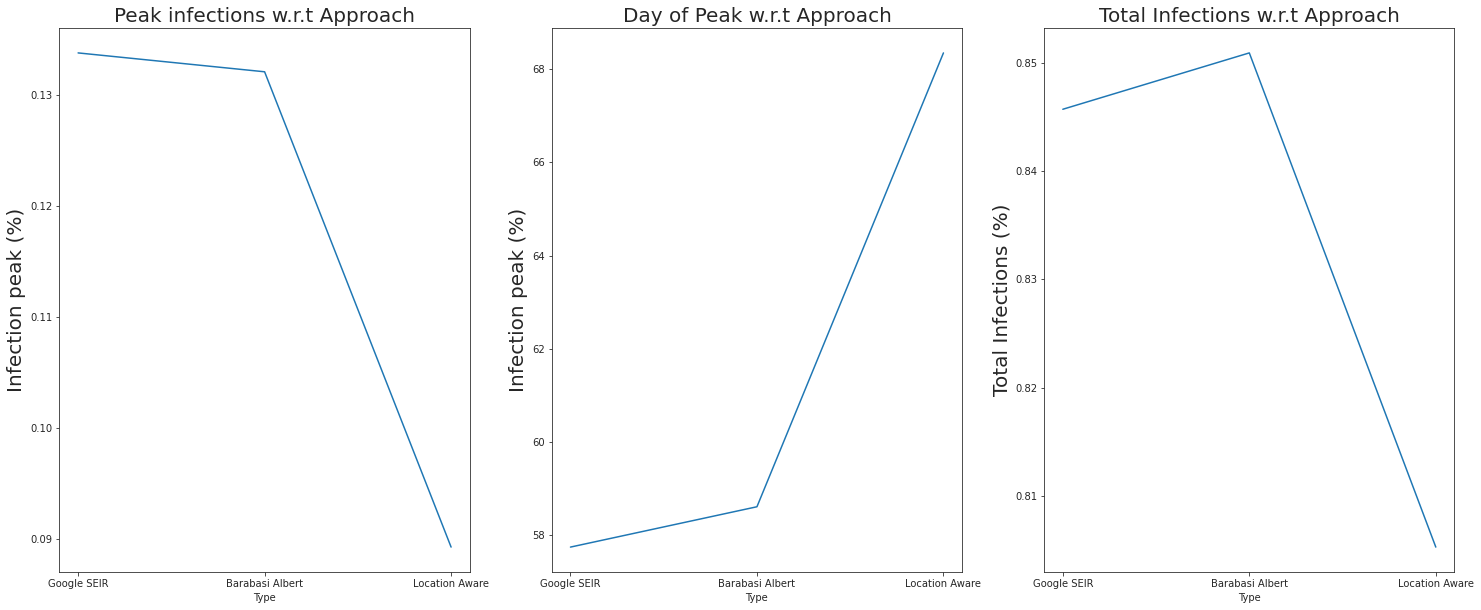

In [71]:
fig,axs = plt.subplots(1,3)
a = sns.lineplot(data=df,x='Type',y='Max',ax= axs[0])
a.axes.set_title("Peak infections w.r.t Approach",fontsize=20)
a.set_ylabel("Infection peak (%)",fontsize=20)

b = sns.lineplot(data=df,x='Type',y='Days',ax= axs[1] )
b.axes.set_title("Day of Peak w.r.t Approach",fontsize=20)
b.set_ylabel("Infection peak (%)",fontsize=20)


c =sns.lineplot(data=df,x='Type',y='Tot',ax= axs[2] )
c.axes.set_title("Total Infections w.r.t Approach",fontsize=20)
c.set_ylabel("Total Infections (%)",fontsize=20)

In [27]:
def calc_euclid(x,y):
    dist = sum((x-y)**2)

    return dist

In [17]:
def plot_degree_dist(min_degree, mean_degree, gammas):
    
    N=10000
    fig, ax = plt.subplots()
    deg_list=[]
    for gamma in gammas:
        degs = generate_power_law_degrees(N, min_degree, mean_degree, gamma)
        # Degree histogram
        ax = sns.distplot(degs, kde=False, label=gamma, ax=ax)
        # hist_kws={'alpha':0.2}, bins=np.arange(0, 1200, 20),
        deg_list.append(degs)
    ax.set_yscale('log')
    ax.set_xlabel('Degree')
    ax.set_ylabel('Number of nodes')
    ax.legend(title='gamma')
    ax.set_title(f'Degree distribution (log scale) for N={N} nodes, mean={mean_degree}')
    print(np.median(degs), np.sort(degs)[-int(0.001 * N)])  # (median, top 0.1%)
    return ax,deg_list

14.0 145


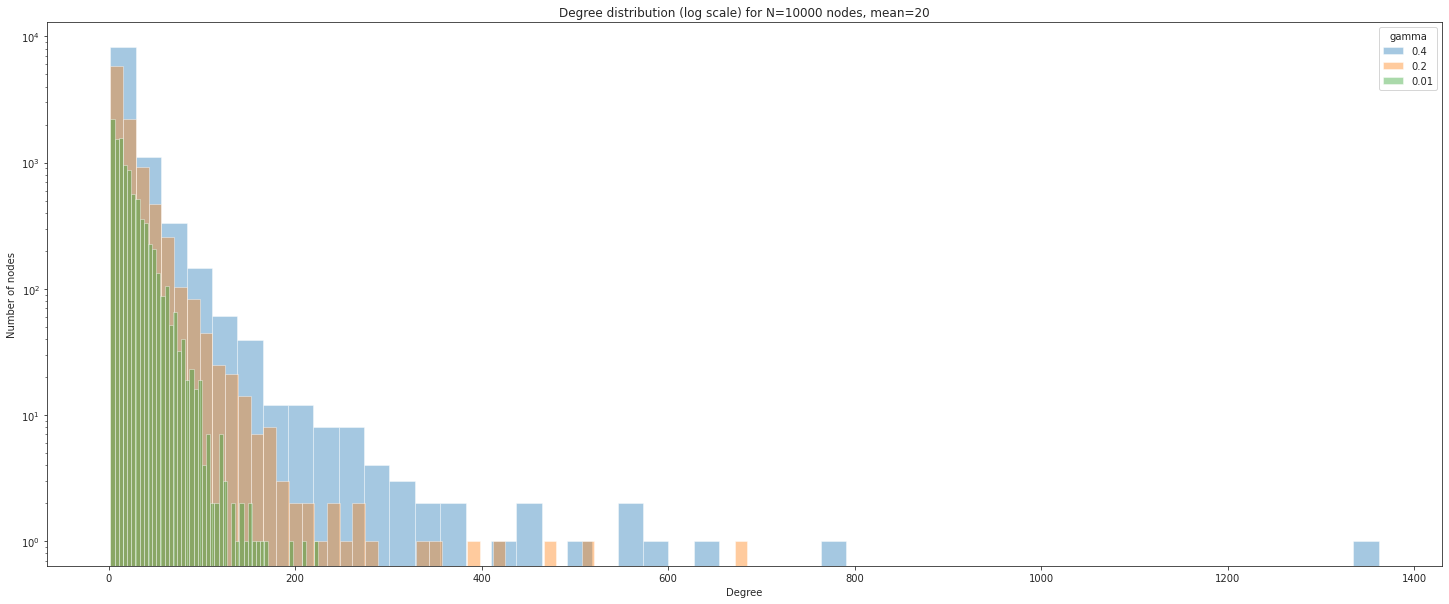

In [23]:
ax,d= plot_degree_dist(2,20,[0.4,0.2,0.01])

In [24]:
#Sort Key
def mykey(x):
    return(x[0])

In [25]:
s = 10000
data1,y1 = make_blobs(n_samples=s,n_features=2,cluster_std=3)

In [28]:
graph_gammas = []
for deg in d:
    g1=nx.Graph()
    g1.add_nodes_from(range(10000))
    for i in range(len(data1)):
        dlist=[]
        for j in range(len(data1)):
            diff = calc_euclid(data1[i],data1[j])
            dlist.append([diff,j])
        dlist.sort(key=mykey)
        #print(dlist[:20])
        edgelist=[]
        for k in range(deg[i]):
            edgelist.append((i,dlist[k+1][1]))
        g1.add_edges_from(edgelist)
    print(i)

    graphs.append(g1)




9999
9999
9999


In [58]:
graphs

t = 0.01
t = 10.02
t = 20.01
t = 30.00
t = 40.01
t = 50.00
t = 60.00
t = 70.00
t = 80.01
t = 90.00
t = 100.00
t = 110.00
t = 120.02
t = 130.00
t = 140.05
t = 150.06
t = 160.12
t = 170.00
t = 180.16
t = 190.25
t = 200.22
t = 210.76


/home/u72216/.local/lib/python3.7/site-packages/seirsplus/models.py:1562: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:,.0%}'.format(y) for y in ax.get_yticks()])


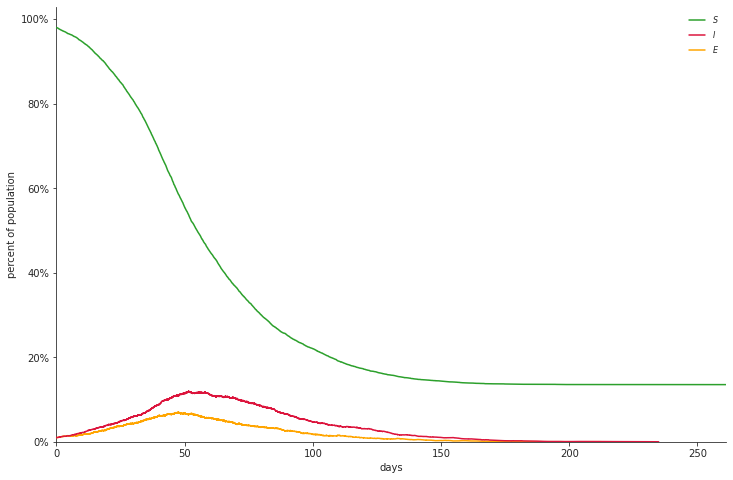

t = 0.01
t = 10.01
t = 20.03
t = 30.01
t = 40.00
t = 50.01
t = 60.00
t = 70.00
t = 80.01
t = 90.00
t = 100.01
t = 110.01
t = 120.07
t = 130.01
t = 140.02
t = 150.01
t = 160.03
t = 170.35
t = 180.49
t = 190.03
t = 200.13
t = 210.34
t = 230.34
t = 240.80


/home/u72216/.local/lib/python3.7/site-packages/seirsplus/models.py:1562: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:,.0%}'.format(y) for y in ax.get_yticks()])


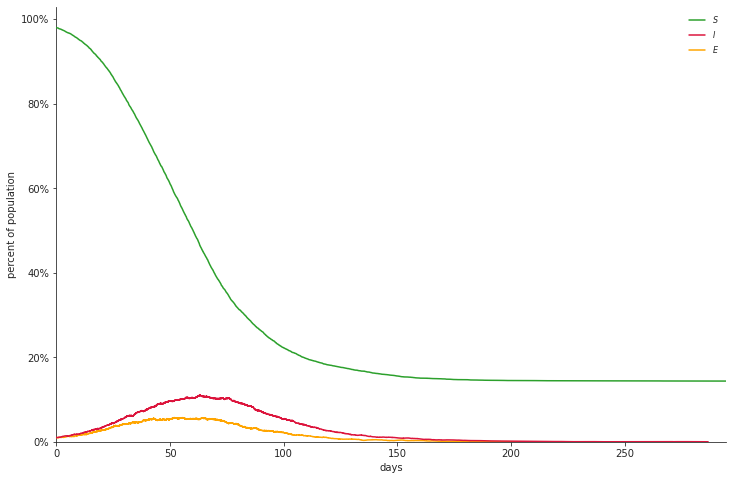

t = 0.01
t = 10.02
t = 20.01
t = 30.02
t = 40.00
t = 50.00
t = 60.00
t = 70.02
t = 80.01
t = 90.00
t = 100.00
t = 110.02
t = 120.01
t = 130.02
t = 140.00
t = 150.03
t = 160.02
t = 170.06
t = 180.02
t = 190.24
t = 200.18
t = 230.25


/home/u72216/.local/lib/python3.7/site-packages/seirsplus/models.py:1562: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:,.0%}'.format(y) for y in ax.get_yticks()])


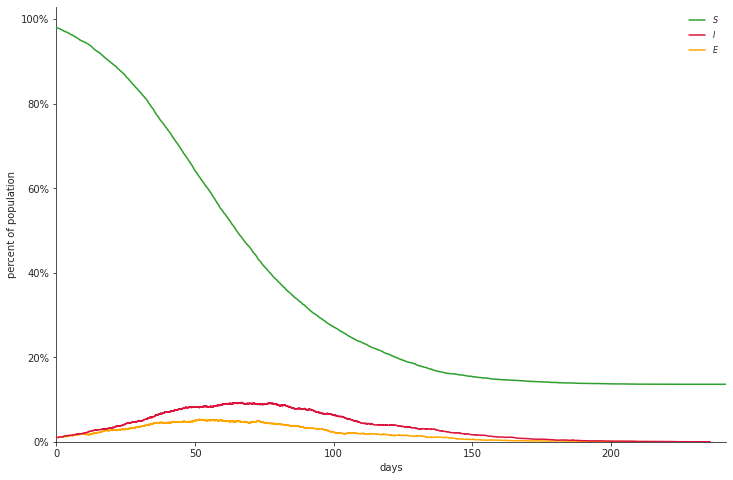

In [60]:
res1,line1,exp,sus = ipfnB(graphs[3],e=1,i=1)
res2,line2,exp,sus = ipfnB(graphs[4],e=1,i=1)
res3,line3,exp,sus = ipfnB(graphs[5],e=1,i=1)


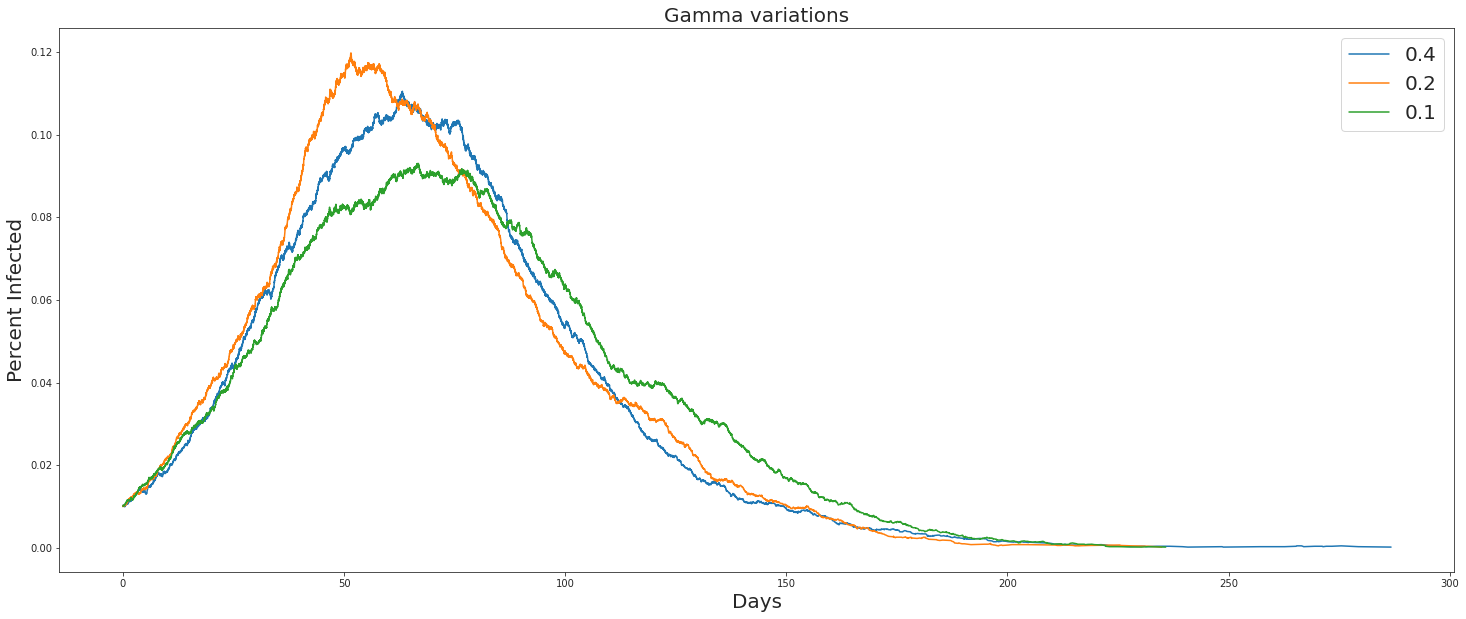

In [62]:

x1 = line1[0].compressed()
y1 = line1[1].compressed()
plt.plot(x1, y1, label = "0.4")

x2 = line2[0].compressed()
y2 = line2[1].compressed()
plt.plot(x2, y2, label = "0.2")

x3 = line3[0].compressed()
y3 = line3[1].compressed()
plt.plot(x3, y3, label = "0.1")

plt.legend(prop={'size': 20})
plt.title('Gamma variations', fontsize =20)
plt.xlabel('Days' ,fontsize =20)
plt.ylabel('Percent Infected', fontsize =20)
plt.show()